MARKETING DATA SCIENCE PROJECT / CUSTOMER SEGMENTATION 

Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
# sns.set()

In [5]:
import warnings
warnings.filterwarnings("ignore")

Data Source

https://archive.ics.uci.edu/dataset/352/online+retail

Data Importing & Inspecting

In [11]:
retail = pd.read_excel('Desktop/custumer segmentation/Online Retail.xlsx')
retail.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
retail_df = retail.copy()

In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
retail_df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


Data Preparation and Exploration

In [16]:
#checking the missing values inside the columns 
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
#lets delete the missing values detected
retail_df.dropna(inplace=True)

In [18]:
retail_df.shape

(406829, 8)

In [19]:
retail_df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [20]:
# Group by 'Description', aggregate by summing 'Quantity', and then sort by 'Quantity'
retail_df.groupby('Description').agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [21]:
#calculate how much enteries contain 'C' letter
retail_df['InvoiceNo'].str.contains('C').count()

8905

In [22]:
#This line generates a Boolean Series where each value is True if the corresponding entry in the InvoiceNo column contains the letter "C"
retail_df['InvoiceNo'].str.contains("C", na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 406829, dtype: bool

In [23]:
#filters out and removes rows from retail_df where the InvoiceNo column contains the letter "C"using ~ .
retail_df[~retail_df['InvoiceNo'].str.contains("C", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
# add new column"TotalPrice" to Calculate the price that payed by the customer for each item
retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [25]:
#see the new version of our dataset
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


RFM Analysis

In [27]:
#Lets understand the purchasing behavior of the customer : "recency , Frequency , Monetary"

In [28]:
#Importing the datetime module
import datetime as dt 

In [29]:
#Finding the Latest Invoice Date
retail_df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [30]:
#Defining Today's Date
today_date = dt.datetime(2011, 12, 11)

In [31]:
# Assuming today_date is already defined as the current date
# For example: today_date = dt.datetime(2011, 12, 11)

rfm = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'TotalPrice': lambda price: price.sum()})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [32]:
#Change columns name
rfm.columns=["Recency","Frequency","Monetary"]

In [33]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [34]:
#Delete customers that not had purchases
rfm = rfm[rfm["Monetary"] > 0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,11,1545.41
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [35]:
# Applying qcut to divide Recency into 5 quantiles in descending order :
rfm["recency_score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

In [36]:
# Applying qcut to divide Frequency ranks into 5 quantiles and labeling them
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [37]:
#Divided the ranked frequencies into 5 quantiles and assigned labels from 1 to 5 based on the quantile group
rfm["monetary_score"] = pd.qcut(rfm["Monetary"],5,labels=[1, 2, 3, 4, 5])

In [38]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12347.0,3,7,4310.00,5,4,5
12348.0,76,4,1797.24,2,3,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2
12352.0,37,11,1545.41,3,5,4


In [67]:
# Create a combined RFM score by concatenating the recency and frequency
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

In [69]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12347.0,3,7,4310.00,5,4,5,54
12348.0,76,4,1797.24,2,3,4,23
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11
12352.0,37,11,1545.41,3,5,4,35


In [71]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12347.0,3,7,4310.00,5,4,5,54
12348.0,76,4,1797.24,2,3,4,23
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11
12352.0,37,11,1545.41,3,5,4,35


In [79]:
#segmenting customers using RFM Scorer 
seg_map = {
    r'[1-2][1-2]' : 'hibernating',
    r'[1-2][3-4]' : 'at_risk',
    r'[1-2]5' : 'cant_loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalists',
    r'5[4-5]' : 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

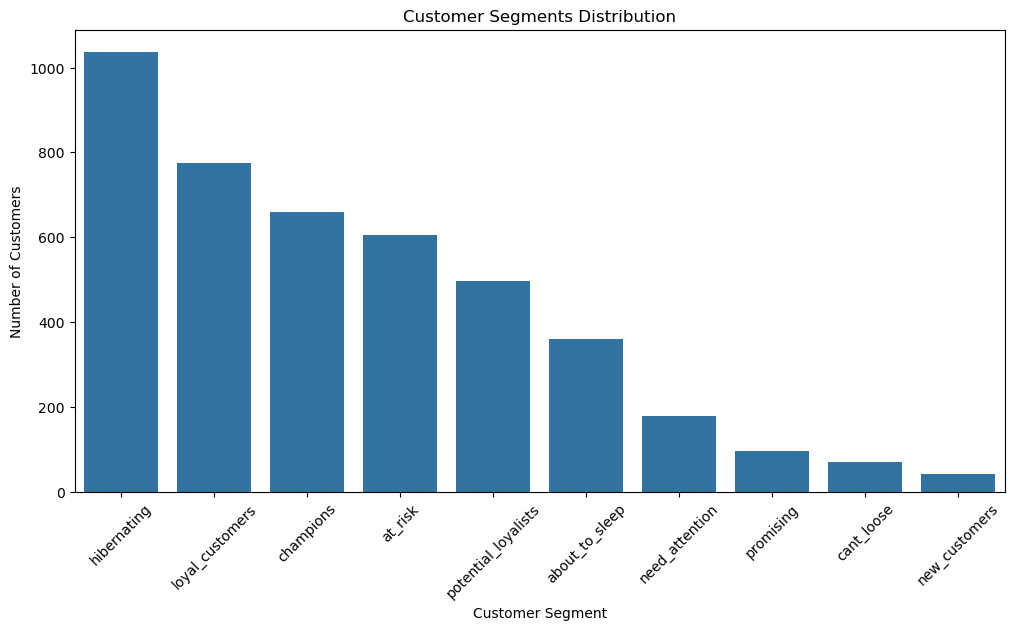

In [82]:
# Plotting the distribution of customer segments
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x='segment', order=rfm['segment'].value_counts().index)
plt.title('Customer Segments Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()